<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/27SepDendroAglo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agrupamiento Aglomerativo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ejemplo1

In [ ]:
url = 'https://bit.ly/2COHM14'
data= pd.read_csv(url)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Es recomendable transformar los datos a una misma escala para que estos algoritmos no se sesguen

Cuando datos son positivos se recomienda normalizar

Aquí como en PCA se recomienda estandarizar

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data) # Da unvector
# Transformalo a un dataframe
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [ ]:
data_scaled.shape

(440, 8)

## Construimos el Dendograma

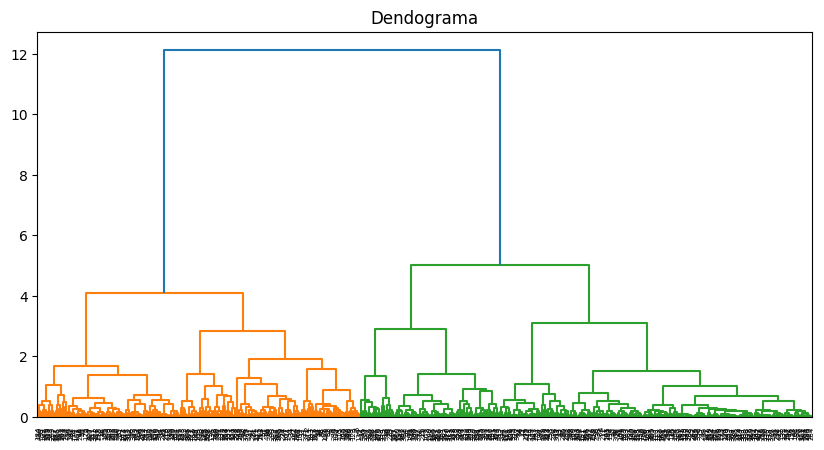

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,5))
plt.title('Dendograma')
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

## Obtención de los grupos

In [ ]:
# Obtuvimos n=2
# Nos esta diciendo a que grupo pertenece cada dato
from sklearn.cluster import AgglomerativeClustering
# Se debe usar como linkage la misma que usamos en scipy, en este caso ward
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Para visualizar los grupos pensamos en aplanarlos y dejarlo en 2 dim

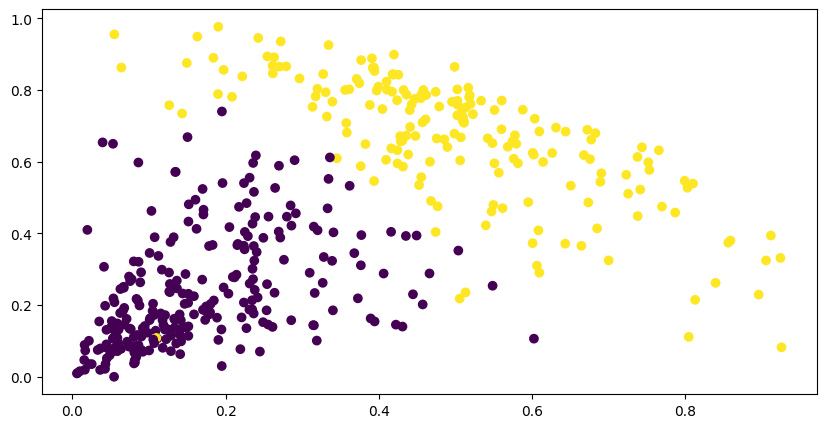

In [ ]:
# Visualización
plt.figure(figsize=(10,5))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c=cluster.labels_)

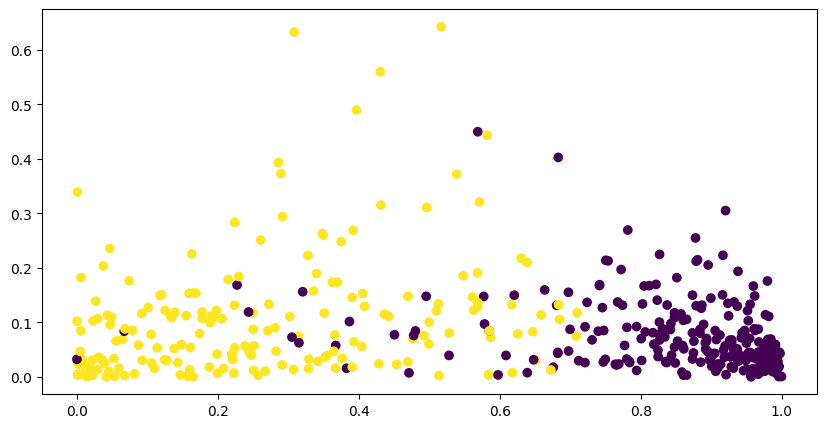

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data_scaled.Fresh, data_scaled.Delicassen, c=cluster.labels_)

## Ejemplo2

In [ ]:
# Ejemplo 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/Mall_Customers.csv'
dataset = pd.read_csv(url)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = dataset.iloc[:,[3,4]].values
len(X)

200

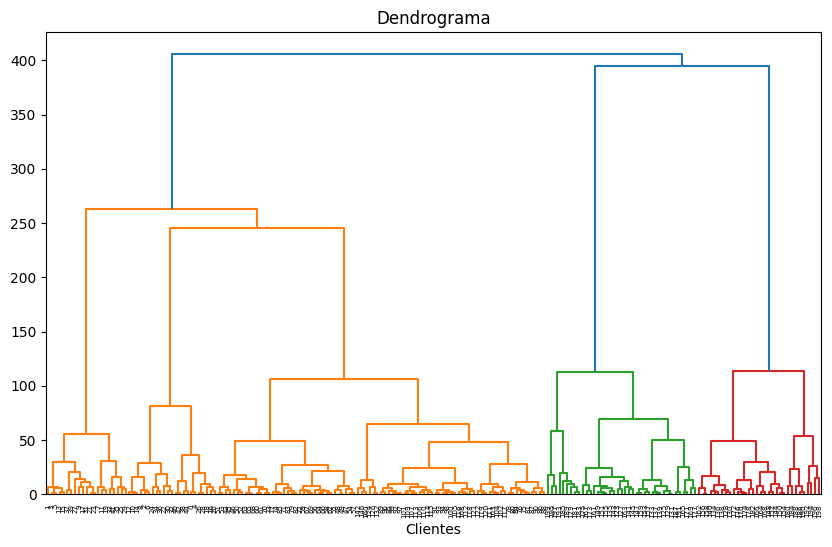

In [ ]:
# Dendrogrma
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,6)) # se pone al inicio para que no genere otra gráfica sin nada
dend = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.show()

El Dendograma nos indica 3 grupos pero nos conviene tomar el mayor numero de grupos. Vamos a ver las diferencias

In [ ]:
# Agrupamiento n=3
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

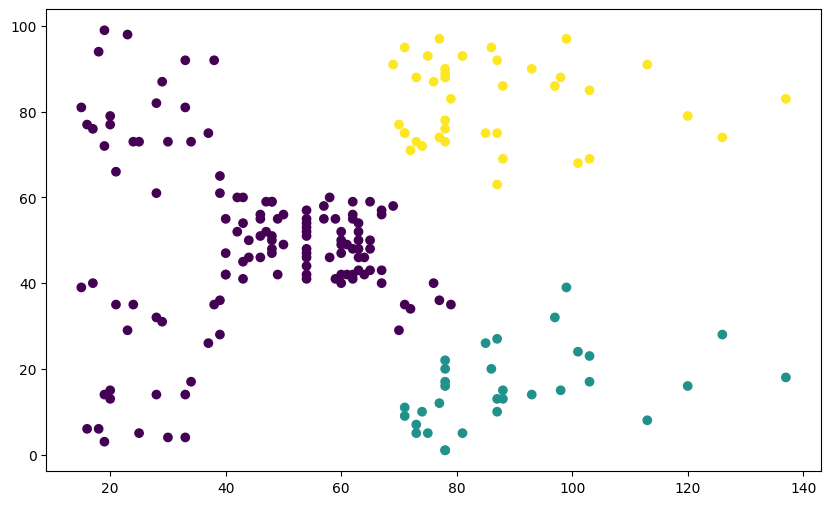

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_hc)

In [ ]:
# Agrupamiento n=5
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

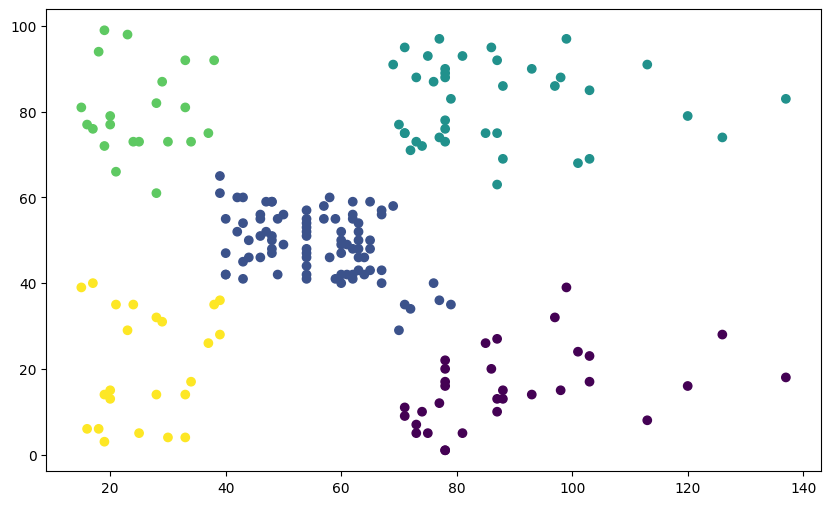

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_hc)

Continuar con la otra visualización con más código escrito en las notas

Tarea: Para el viernes cuando también se entrega en conjunto de datos elegido

Hacer la tarea de probar con otras distancias y tipos de enlazamiento